# Time Series Analysis using Python  - Time Series Forecasting

In [25]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.seasonal import seasonal_decompose

In [48]:
# loading dataset / read the data
df =pd.read_csv('AirPassengers.csv')

In [49]:
df.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [50]:
# always rename afterwards
df.rename(columns={'#Passengers':'Passengers'},inplace=True)
df.head()

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [51]:
# check data types
df.dtypes

Month         object
Passengers     int64
dtype: object

In [52]:
df =pd.read_csv('AirPassengers.csv',parse_dates=['Month'])

In [53]:
df.dtypes

Month          datetime64[ns]
#Passengers             int64
dtype: object

In [54]:
# we providing inputs to tell pandas that we are trying to work with time series.
df =pd.read_csv('AirPassengers.csv',parse_dates=['Month'],index_col='Month')

In [55]:
df.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [56]:
df.dtypes

#Passengers    int64
dtype: object

In [57]:
# we can conveniently do slicing i.e obtain data for specific time period. as you wish like period.
df['1950-05-01':'1951-05-01']

,#Passengers
Month,
1950-05-01,125
1950-06-01,149
1950-07-01,170
1950-08-01,170
1950-09-01,158
1950-10-01,133
1950-11-01,114
1950-12-01,140
1951-01-01,145


In [58]:
# we can check value corresponding to a specific time point
df.loc['1960-05-01']

#Passengers    472
Name: 1960-05-01 00:00:00, dtype: int64

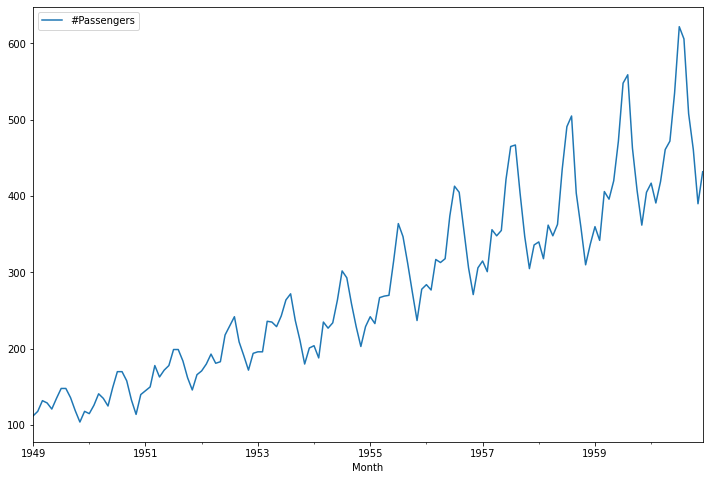

In [59]:
# plot the time series
df.plot()
plt.show()

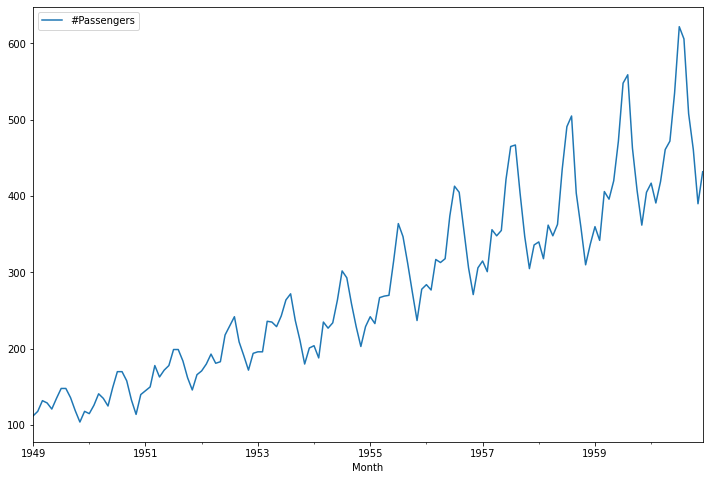

In [60]:
# increase the figure size
from pylab import rcParams
rcParams['figure.figsize']=12,8
df.plot()
plt.show()

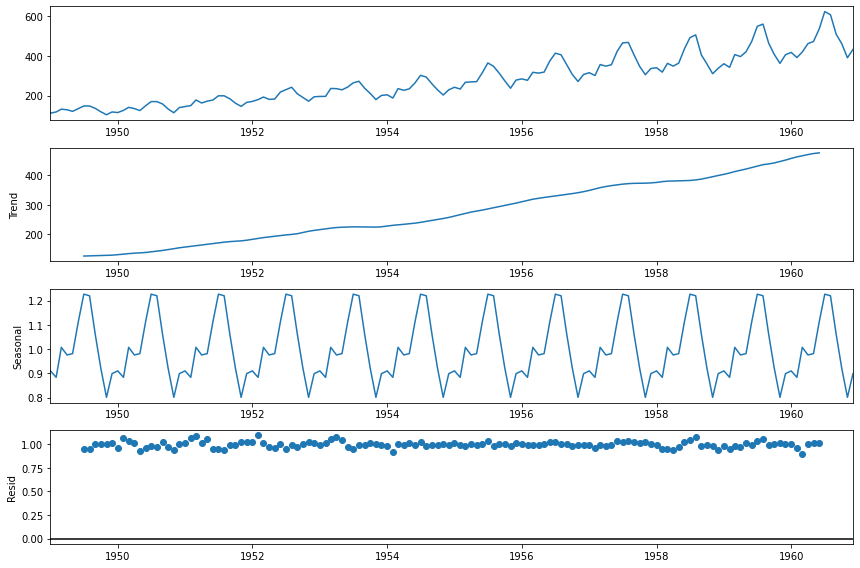

In [61]:
# decompose the time series multiplicatively
df_mul_decompose = seasonal_decompose(df, model='multiplicative')
df_mul_decompose.plot()
plt.show()

In [62]:
# let's try to do log transformation
df_log = df.copy()

In [63]:
df_log['Passengers'] = np.log(df)

In [64]:
df_log.Passengers

Month
1949-01-01    4.718499
1949-02-01    4.770685
1949-03-01    4.882802
1949-04-01    4.859812
1949-05-01    4.795791
                ...   
1960-08-01    6.406880
1960-09-01    6.230481
1960-10-01    6.133398
1960-11-01    5.966147
1960-12-01    6.068426
Name: Passengers, Length: 144, dtype: float64

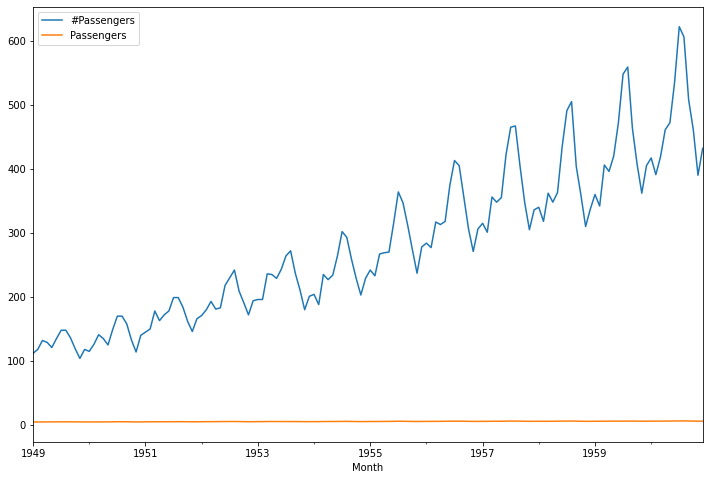

In [65]:
# visualize the log transformed series
df_log.plot()
plt.show()

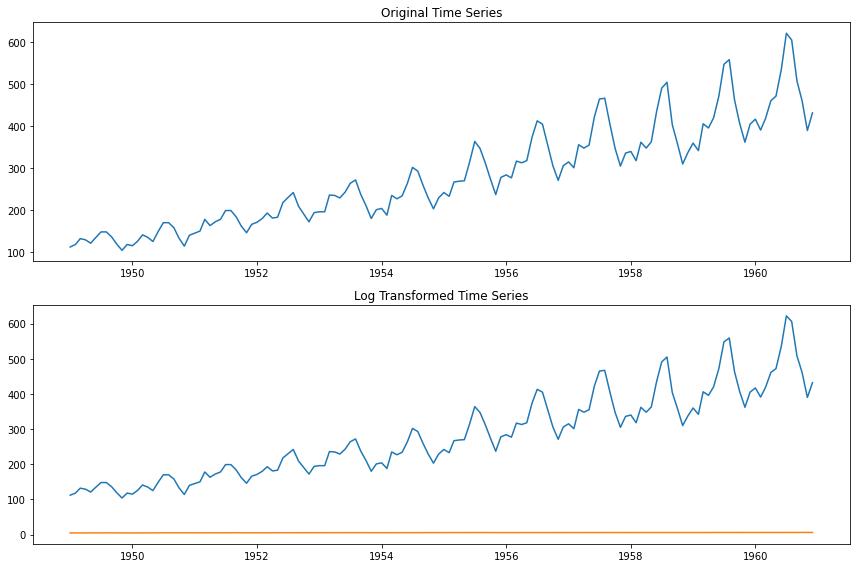

In [66]:
# compare with original series
plt.subplot(2,1,1)
plt.title('Original Time Series')
plt.plot(df)

plt.subplot(2,1,2)
plt.title('Log Transformed Time Series')
plt.plot(df_log)
plt.tight_layout()